<a href="https://colab.research.google.com/github/Balaji317/ci-cd-final-project/blob/main/Design_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#reading the datset
df=pd.read_csv('/content/food_wastage_data.csv')
df

,Type of Food,Number of Guests,Event Type,Quantity of Food,Storage Conditions,Purchase History,Seasonality,Preparation Method,Geographical Location,Pricing,Wastage Food Amount
0,Meat,310,Corporate,450,Refrigerated,Regular,All Seasons,Buffet,Urban,Low,25
1,Meat,400,Birthday,500,Room Temperature,Regular,Winter,Buffet,Suburban,High,40
2,Vegetables,302,Birthday,371,Refrigerated,Regular,Summer,Buffet,Suburban,Low,27
3,Meat,491,Birthday,497,Refrigerated,Regular,All Seasons,Finger Food,Rural,High,32
4,Meat,300,Corporate,400,Refrigerated,Regular,Winter,Finger Food,Urban,Moderate,25
...,...,...,...,...,...,...,...,...,...,...,...
1777,Baked Goods,310,Corporate,350,Room Temperature,Regular,Summer,Finger Food,Urban,High,35
1778,Baked Goods,284,Social Gathering,443,Room Temperature,Regular,Winter,Buffet,Rural,Low,32
1779,Fruits,220,Wedding,300,Room Temperature,Regular,All Seasons,Finger Food,Urban,Moderate,15
1780,Fruits,250,Wedding,350,Room Temperature,Regular,All Seasons,Finger Food,Rural,Moderate,20


In [ ]:
df.head()
#displaying first five rows of the dataset

,Type of Food,Number of Guests,Event Type,Quantity of Food,Storage Conditions,Purchase History,Seasonality,Preparation Method,Geographical Location,Pricing,Wastage Food Amount
0,Meat,310,Corporate,450,Refrigerated,Regular,All Seasons,Buffet,Urban,Low,25
1,Meat,400,Birthday,500,Room Temperature,Regular,Winter,Buffet,Suburban,High,40
2,Vegetables,302,Birthday,371,Refrigerated,Regular,Summer,Buffet,Suburban,Low,27
3,Meat,491,Birthday,497,Refrigerated,Regular,All Seasons,Finger Food,Rural,High,32
4,Meat,300,Corporate,400,Refrigerated,Regular,Winter,Finger Food,Urban,Moderate,25


In [ ]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1782 entries, 0 to 1781
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Type of Food           1782 non-null   object
 1   Number of Guests       1782 non-null   int64 
 2   Event Type             1782 non-null   object
 3   Quantity of Food       1782 non-null   int64 
 4   Storage Conditions     1782 non-null   object
 5   Purchase History       1782 non-null   object
 6   Seasonality            1782 non-null   object
 7   Preparation Method     1782 non-null   object
 8   Geographical Location  1782 non-null   object
 9   Pricing                1782 non-null   object
 10  Wastage Food Amount    1782 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 153.3+ KB


In [ ]:
# Display descriptive statistics of the dataset
df.describe()

,Number of Guests,Quantity of Food,Wastage Food Amount
count,1782.000000,1782.000000,1782.000000
mean,317.804714,411.125701,28.536476
std,67.829658,65.204674,10.461317
min,207.000000,280.000000,10.000000
25%,267.000000,350.000000,20.000000
50%,302.000000,400.000000,26.500000
75%,350.000000,480.000000,35.000000
max,491.000000,500.000000,63.000000


In [ ]:
# List all columns in the dataset
print(df.columns)

Index(['Type of Food', 'Number of Guests', 'Event Type', 'Quantity of Food',
       'Storage Conditions', 'Purchase History', 'Seasonality',
       'Preparation Method', 'Geographical Location', 'Pricing',
       'Wastage Food Amount'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder

# ----> Load your data into a pandas DataFrame <----
# Replace 'your_data.csv' with the actual path to your data file
df = pd.read_csv('/content/food_wastage_data.csv')

# Define features (X) and target (y)
features = ['Type of Food', 'Number of Guests', 'Event Type', 'Quantity of Food',
            'Storage Conditions', 'Purchase History', 'Seasonality',
            'Preparation Method', 'Geographical Location', 'Pricing']
target = 'Wastage Food Amount'
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Adjust test_size and random_state as needed


categorical_features = ['Type of Food', 'Event Type', 'Storage Conditions', 'Purchase History', 'Seasonality', 'Preparation Method', 'Geographical Location']

# Now you can fit the encoder using X_train
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X_train[categorical_features])

# ----> Convert categorical features to numerical using one-hot encoding <----
# Create a OneHotEncoder instance
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output

# Fit the encoder on the categorical features and transform them
X_encoded = encoder.fit_transform(X.select_dtypes(include=['object'])) # Select only object (string) columns

# Create a new DataFrame with the encoded features
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(X.select_dtypes(include=['object']).columns))

# Concatenate the encoded features with the numerical features
X = pd.concat([X.select_dtypes(exclude=['object']), X_encoded_df], axis=1)

# Split data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression() # Initialize the model
model.fit(X_train, y_train) # Train the model

# Make predictions on the test set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 25.256443409844618
R-squared: 0.7563478558273058


In [ ]:
import tensorflow as tf
# Create a sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32) # Use y_train instead of X_test

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 294.9199
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 84.1812
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 68.6069
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.7516
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 64.8484
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.0999
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 58.2486
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 60.8811
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.8592
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 50.7856


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Access training and validation metrics from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 53.6898 - val_loss: 49.3179
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 53.1741 - val_loss: 49.0442
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 49.8029 - val_loss: 48.9363
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 47.8341 - val_loss: 49.8998
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 53.3341 - val_loss: 44.8269
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 45.9910 - val_loss: 43.3184
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 48.0845 - val_loss: 43.4610
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 46.3796 - val_loss: 43.6155
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.1517 - val_loss: 39.2912
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.4412 - val_loss: 41.3337


In [ ]:
loss = model.evaluate(X_test, y_test, verbose=0)

# Print the loss
print("Loss:", loss)

Loss: 41.33369064331055


In [ ]:
!pip install matplotlib

Epoch 1/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 41.2742 - val_loss: 41.6739
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 37.5421 - val_loss: 40.5994
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 37.3742 - val_loss: 38.7562
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.5091 - val_loss: 33.9213
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 36.8506 - val_loss: 35.9097
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 34.7568 - val_loss: 32.7334
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 35.2681 - val_loss: 31.4879
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31.5657 - val_loss: 31.8414
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 35.8495 - val_loss: 32.2903
Epoch 10/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 32.3698 - val_loss: 29.5858


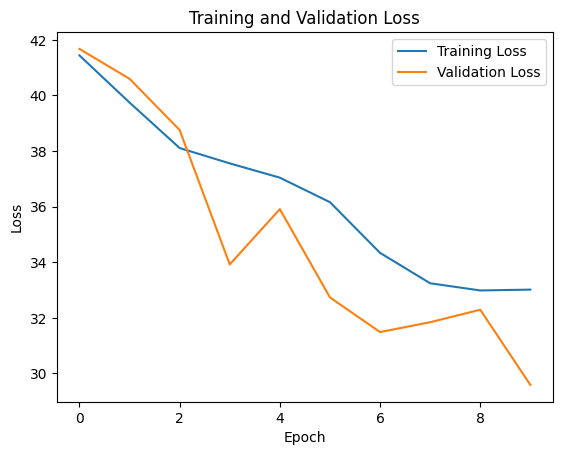

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and stored the history in the 'history' variable:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the training and validation loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create the plot
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')

# Add labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
def predict_wastage(encoder):
    """Predicts the target variable (food wastage) based on user input."""
    input_data = {}
    for attribute in ['Type of Food', 'Number of Guests', 'Event Type', 'Quantity of Food', 'Storage Conditions',
                      'Purchase History', 'Seasonality', 'Preparation Method', 'Geographical Location', 'Pricing']:
        input_data[attribute] = input(f"Enter {attribute}: ")
    input_df = pd.DataFrame([input_data])
    categorical_features = [col for col in ['Type of Food', 'Event Type', 'Storage Conditions', 'Purchase History',
                                            'Seasonality', 'Preparation Method', 'Geographical Location']
                           if col in X_train.columns]
    numerical_features = [col for col in ['Number of Guests', 'Quantity of Food'] if col in X_train.columns]
    encoded_data = encoder.transform(input_df[categorical_features])
    encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))
    input_df = pd.concat([input_df[numerical_features].astype(float), encoded_df], axis=1)
    input_df = input_df.reindex(columns=X_train.columns, fill_value=0)
    predicted_wastage = model.predict(input_df)[0]
    return predicted_wastage
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(X_train[[col for col in categorical_features if col in X_train.columns]])
predicted_wastage = predict_wastage(encoder)
print("Predicted Wastage Food Amount:", predicted_wastage)


Enter Type of Food: Meat
Enter Number of Guests: 100
Enter Event Type: Birthday
Enter Quantity of Food: 200
Enter Storage Conditions: Refrigerator
Enter Purchase History: Regular
Enter Seasonality: All seasons
Enter Preparation Method: Buffet
Enter Geographical Location: Rural
Enter Pricing: low
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted Wastage Food Amount: [12.116896]
